Question 7
======

#### Setup

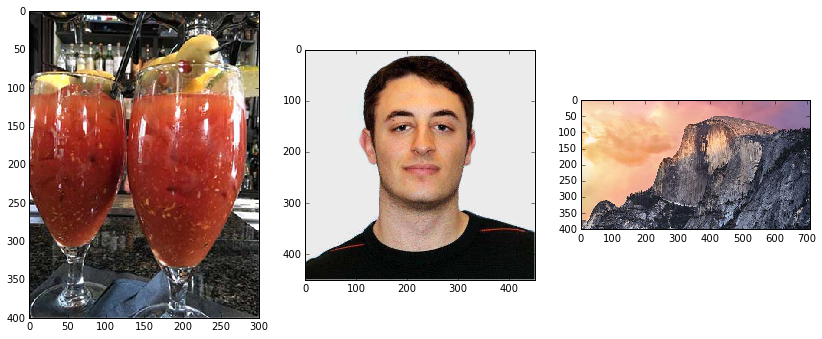

In [70]:
# Dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage import color
from skimage import img_as_float, img_as_ubyte, img_as_uint
import glob

# Set defaults
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['image.interpolation'] = 'none'
plt.rcParams['figure.figsize'] = 14, 14

# Import images
imgpaths = glob.glob('./images/*.jpg')
imgset = [img_as_ubyte(mpimg.imread(x)) for x in imgpaths]

# Display thumbnails of the images to ensure loading
plt.figure()
for i,img in enumerate(imgset):
    plt.subplot(1, len(imgset), i+1)
    plt.imshow(img, cmap = 'gray')

Code
===

In [71]:
# easy plotting
def plot(img):
    plt.figure()
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap = 'gray')

In [72]:
# https://upload.wikimedia.org/wikipedia/commons/thumb/3/38/BYR_color_wheel.svg/2000px-BYR_color_wheel.svg.png
COLOR_WHEEL = [
    [254, 254, 51],
    [250, 188, 2],
    [251, 153, 2],
    [253, 83, 8],
    [254, 39, 18],
    [167, 25, 75],
    [134, 1, 175],
    [61, 1, 164],
    [2, 71, 254],
    [3, 146, 206],
    [102, 176, 50],
    [208, 234, 43]
]

def map_pixel_color_wheel(pixel, wheel):
    bestColor = False
    bestAvg = 256
    
    for color in wheel:
        avg = (abs(pixel[0] - color[0]) + abs(pixel[1] - color[1]) + abs(pixel[2] - color[2])) / 3
        if avg < bestAvg:
            bestAvg = avg
            bestColor = color
            
    return bestColor

# Maps the actual image to the colors of the wheel
def map_img_color_wheel(img, wheel):
    img = img.copy()
    
    # Iterate rows
    for x, row in enumerate(img):
        
        # Iterate columns
        for y, pixel in enumerate(row):
            
            # handle monochromatic imgs
            if len(pixel) == 2:
                return img
            
            # Map pixel
            img[x][y] = map_pixel_color_wheel(pixel, wheel)
    
    return img

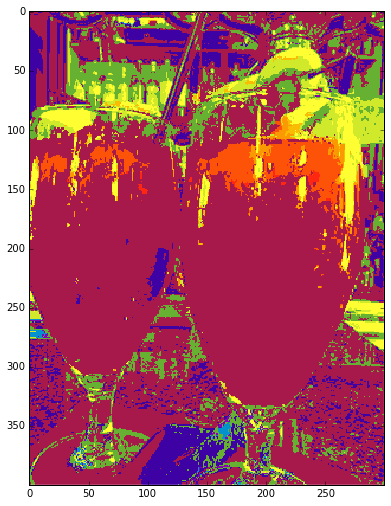

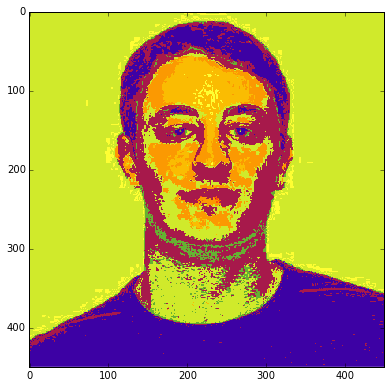

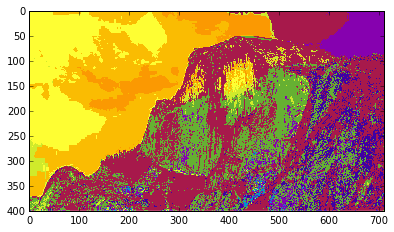

In [73]:
for img in imgset:
    plot(map_img_color_wheel(img, COLOR_WHEEL))

In [76]:
# generate a color wheel based on an image
def generate_color_wheel(img):
    img = img.copy()
    skip = len(img) / 3
    img = img[::skip,::skip]
    colors = []
    for row in img:
        for pixel in row:
            colors.append(pixel)
    return colors

/Users/abarba/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:22: RuntimeWarning: overflow encountered in ubyte_scalars


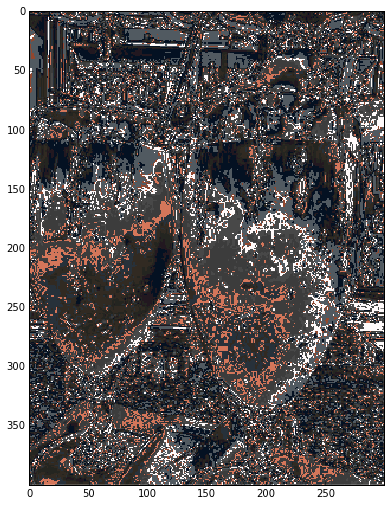

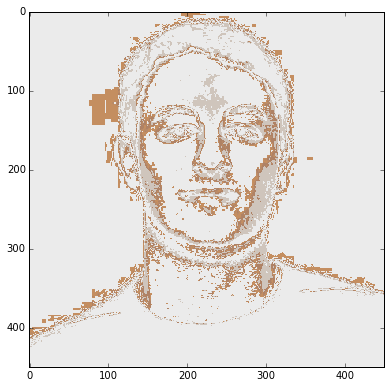

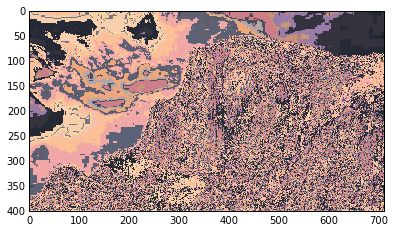

In [79]:
for img in imgset:
    wheel = generate_color_wheel(img)
    plot(map_img_color_wheel(img, wheel))

Conclusion
======

This problem was broken up into 3 parts. First, mapping a single pixel to the most similar color in an array of colors aka a color wheel. I took a nice simmple approach here by computin the difference in R, G and B values and then averaging that difference together. The closer to 0 the average is, the more similar those pixels are. I then looped through each pixel in the wheel and store the best match, returning that at the end of the function. 

Part 2 was simple, simply loop through all pixels in the image and apply my previous function to each pixel and then plot it.

Part 3 was a bit more complicated and I again took a nice simple approach, decimating the image into just a few pixels. I used the same decimate function in assignment 2 which essentially just down samples the image to a lower resolution. This gives a good idea of the most dominant colors in the image. I then used those colors as my color wheel and then plotted the results.